In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import sympy as smp

from rwa_tools import (
    create_coupling_graph,
    create_hamiltonian_symbolic,
    create_hamiltonian_rwa,
)
from rwa_tools.graph_transform import create_transform_matrix

In [ ]:
nstates = 5
couplings = [[(0, 4), (1, 4)], [(2, 4), (3, 4)], [(1, 3)], [(0, 4), (1, 4)]]
hamiltonian = create_hamiltonian_symbolic(couplings, nstates)
coupling_graph = create_coupling_graph(couplings, nstates=nstates)

In [3]:
hamiltonian.total

Matrix([
[                                                               E0,                                                                 0,                               0,                               0, a0*Ω0*exp(I*t*ω0)/2 + a4*Ω3*exp(I*t*ω3)/2,  0],
[                                                                0,                                                                E1,                               0,                Ω2*exp(I*t*ω2)/2, a1*Ω0*exp(I*t*ω0)/2 + a5*Ω3*exp(I*t*ω3)/2,  0],
[                                                                0,                                                                 0,                              E2,                               0,                       a2*Ω1*exp(I*t*ω1)/2,  0],
[                                                                0,                                      exp(-I*t*ω2)*conjugate(Ω2)/2,                               0,                              E3,                       a3*Ω1*exp(I*t*ω1)/2, 

In [4]:
coupling_graph.edges

MultiEdgeView([(0, 4, 0), (0, 4, 1), (1, 4, 0), (1, 4, 1), (1, 3, 0), (2, 4, 0), (3, 4, 0)])

In [5]:
coupling_graph.get_edge_data(0,4)

{0: {'frequency': ω0, 'rabi': a0*Ω0, 'type': 'coupling'},
 1: {'frequency': ω3, 'rabi': a4*Ω3, 'type': 'coupling'}}

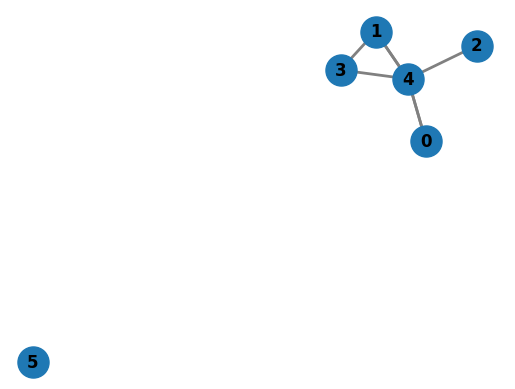

In [6]:
fig, ax = plt.subplots()
pos = nx.spring_layout(coupling_graph)  # Generate positions for nodes
# Draw nodes and connections
nx.draw(coupling_graph, pos, ax=ax, with_labels=True,
    node_size=500, font_weight='bold', font_size=12,
    width=2, edge_color='gray')

In [7]:
hamiltonian.total

Matrix([
[                                                               E0,                                                                 0,                               0,                               0, a0*Ω0*exp(I*t*ω0)/2 + a4*Ω3*exp(I*t*ω3)/2,  0],
[                                                                0,                                                                E1,                               0,                Ω2*exp(I*t*ω2)/2, a1*Ω0*exp(I*t*ω0)/2 + a5*Ω3*exp(I*t*ω3)/2,  0],
[                                                                0,                                                                 0,                              E2,                               0,                       a2*Ω1*exp(I*t*ω1)/2,  0],
[                                                                0,                                      exp(-I*t*ω2)*conjugate(Ω2)/2,                               0,                              E3,                       a3*Ω1*exp(I*t*ω1)/2, 

In [8]:
hamiltonian.coupling_matrix

Matrix([
[                                                                0,                                                                 0,                               0,                               0, a0*Ω0*exp(I*t*ω0)/2 + a4*Ω3*exp(I*t*ω3)/2, 0],
[                                                                0,                                                                 0,                               0,                Ω2*exp(I*t*ω2)/2, a1*Ω0*exp(I*t*ω0)/2 + a5*Ω3*exp(I*t*ω3)/2, 0],
[                                                                0,                                                                 0,                               0,                               0,                       a2*Ω1*exp(I*t*ω1)/2, 0],
[                                                                0,                                      exp(-I*t*ω2)*conjugate(Ω2)/2,                               0,                               0,                       a3*Ω1*exp(I*t*ω1)/2, 0],

In [9]:
hamiltonian.coupling_symbol_paths

{(0, 4): [ω0, ω3], (1, 4): [ω0, ω3], (2, 4): [ω1], (3, 4): [ω1], (1, 3): [ω2]}

In [10]:
T = create_transform_matrix(coupling_graph)
T

Matrix([
[exp(I*t*ω0),           0,           0,           0, 0, 0],
[          0, exp(I*t*ω0),           0,           0, 0, 0],
[          0,           0, exp(I*t*ω1),           0, 0, 0],
[          0,           0,           0, exp(I*t*ω1), 0, 0],
[          0,           0,           0,           0, 1, 0],
[          0,           0,           0,           0, 0, 1]])

In [11]:
hamiltonian_rwa = create_hamiltonian_rwa(hamiltonian, T)
hamiltonian_rwa.hamiltonian

Matrix([
[                                                     E4 + δ0,                                                            0,                  0,                                                0, a0*Ω0/2 + a4*Ω3*exp(-I*t*δ0 + I*t*δ3)/2,  0],
[                                                           0,                                           -E0 + E1 + E4 + δ0,                  0, Ω2*exp(I*t*(E0 - E1 - E2 + E3 - δ0 + δ1 + δ2))/2, a1*Ω0/2 + a5*Ω3*exp(-I*t*δ0 + I*t*δ3)/2,  0],
[                                                           0,                                                            0,            E4 + δ1,                                                0,                                 a2*Ω1/2,  0],
[                                                           0, exp(I*t*(-E0 + E1 + E2 - E3 + δ0 - δ1 - δ2))*conjugate(Ω2)/2,                  0,                               -E2 + E3 + E4 + δ1,                                 a3*Ω1/2,  0],
[a0*conjugate(Ω0)/2 + a4*ex